# A. Project Name:  IMDb Successful Movie.
- **Student Name:** Eduardo Galindez.
- **Coding Dojo Bootcamp:** Data Science.
  - **Stack:** Data Enrichment.
- **Date:** September 23th, 2022.

# B. Project Objective
For Part E of the project, we will be using our MySQL database from Part C to answer meaningful questions for the stakeholder. They want we to use our hypothesis testing and statistics knowledge to answer some questions about what makes a successful movie.

# C. Project Statement


### Questions to Answer:
The stakeholder's first question is: 
1. Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?
    - They want we to perform a statistical test to get a mathematically-supported answer.
    - They want we to report if we found a significant difference between ratings.
        - If so, what was the p-value of you analysis?
        - And which rating earns the most revenue?
    - They want we to prepare a visualization that supports your finding.

2. Do movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long (or less)?
3. Do movies released in 2020 earn less revenue than movies released in 2018?
4. How do the years compare for movie ratings?
5. Do some movie genres earn more revenue than others?
6. Are some genres higher rated than others?

# D. Project Development

## 1.- Libraries & Functions

In [1]:
# Libraries.
import numpy as np
import pandas as pd
import tmdbsimple as tmdb 
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm_notebook

## 2.-  Data & Connection

### 2.2.- Loading data.
- The data to work with is from Part D.

In [2]:
# Load title basics table.
title_basics_df = pd.read_csv('./Data/title_basics.csv.gz')
title_basics_df.head(5)

,tconst,primaryTitle,startYear,runtimeMinutes
0,tt0108549,West from North Goes South,2004,96
1,tt0113026,The Fantasticks,2000,86
2,tt0113092,For the Cause,2000,100
3,tt0114447,The Silent Force,2001,90
4,tt0115937,Consequence,2000,91


In [3]:
# Load genres table.
genres_df = pd.read_csv('./Data/genres.csv.gz')
genres_df.head(5)

,genre_name,genre_id
0,Action,0
1,Adult,1
2,Adventure,2
3,Animation,3
4,Biography,4


In [4]:
# Load title genres table.
title_genres_df = pd.read_csv('./Data/title_genres.csv.gz')
title_genres_df.head(5)

,tconst,genre_id
0,tt0108549,5
1,tt0108549,15
2,tt0113026,14
3,tt0113026,18
4,tt0113092,0


In [5]:
# Load title ratings.
title_ratings_df = pd.read_csv('./Data/title_ratings.csv.gz')
title_ratings_df.head(5)

,tconst,averageRating,numVotes
0,tt0139422,5.7,122
1,tt0139426,4.8,1258
2,tt0139428,6.3,9
3,tt0139436,7.7,19
4,tt0139438,5.2,10


In [6]:
# Load tmbd table.
tmbd_df = pd.read_csv('./Data/tmdb_results_combined.csv.gz')
tmbd_df = tmbd_df[['imdb_id','budget', 'revenue','certifcation']]
tmbd_df.head(5)

,imdb_id,budget,revenue,certifcation
0,tt0113026,10000000.0,0.0,NaN
1,tt0113092,0.0,0.0,NaN
2,tt0116391,0.0,0.0,NaN
3,tt0118694,150000.0,12854953.0,PG
4,tt0118852,0.0,0.0,R


## 3.- Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

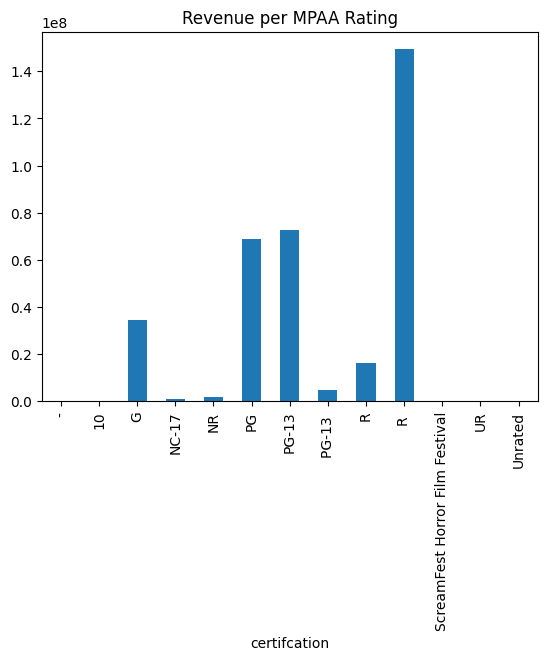

In [7]:
# Before move forward let have a quick look.
tmbd_df.groupby('certifcation')['revenue'].mean().plot(kind='bar', title='Revenue per MPAA Rating');

In [8]:
# Let's check column categories.
tmbd_df['certifcation'].value_counts()

R                                  5910
NR                                 3273
PG-13                              3111
PG                                 1396
G                                   427
NC-17                               155
Unrated                               5
-                                     1
UR                                    1
ScreamFest Horror Film Festival       1
R                                     1
PG-13                                 1
10                                    1
Name: certifcation, dtype: int64

In [9]:
# Check general info in out df.
tmbd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59207 entries, 0 to 59206
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   imdb_id       59207 non-null  object 
 1   budget        59207 non-null  float64
 2   revenue       59207 non-null  float64
 3   certifcation  14283 non-null  object 
dtypes: float64(2), object(2)
memory usage: 1.8+ MB


**Notes:**
- 'certifcation' column has 44,924 missing values, representing 75.9%.
- Inside this columns, we identified some errors caused by misspelling: UR, R and PG-13. These are easy to fix without making assumptions.
- The steps for other errors in same column will be:
    - "-" is going to be inlcude on Unrated category.
    - "ScreamFest Horror Film Festival" will be deleted.
    - "10" will be modify to "PG-10".

In [10]:
# Look for 'ScreamFest Horror Film Festival' error.
tmbd_df[tmbd_df['certifcation'] == 'ScreamFest Horror Film Festival']

,imdb_id,budget,revenue,certifcation
7052,tt0462341,0.0,0.0,ScreamFest Horror Film Festival


In [11]:
# Drop column 7052.
tmbd_df = tmbd_df.drop(labels=7052, axis=0)

In [12]:
# Fixing the errors.
cert_list_replacement = {'UR':'Unrated', 'PG-13 ':'PG-13', '-':'Unrated', 'R ':'R','10':'PG-10'}
tmbd_df['certifcation'] = tmbd_df['certifcation'].replace(cert_list_replacement)

In [13]:
# Confirm modification.
tmbd_df['certifcation'].value_counts()

R          5911
NR         3273
PG-13      3112
PG         1396
G           427
NC-17       155
Unrated       7
PG-10         1
Name: certifcation, dtype: int64

**Notes:**
- Getting back to the question to answer, our stakeholders want to know if the MPAA rating of a movie (G/PG/PG-13/R) affects how much revenue the movie generates.
- In this case, we have a numeric data (revenue) to be compared with more than two groups, so we must run an [ANOVA Test](https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php).

In [ ]:
# A SQL query must be written to bring the info what are looking for (MPAA ratings with genre names).




## 4.- Do movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long (or less)?

In [14]:
# Create a query for title_basics_df (runtimeMinutes) with tmbd_df (revenue).


## 5.- Do movies released in 2020 earn less revenue than movies released in 2018?

In [15]:
# Create a query for title_basics_df (startYear) with tmbd_df (revenue).


## 6.- How do the years compare for movie ratings?

In [16]:
# Create a query for title_basics_df (startYear) with title_ratings_df (averageRating).


## 7.- Do some movie genres earn more revenue than others?

In [17]:
# Create a query for tmbd_df (revenue), genres_df (genre_name) & title_genres_df.

## 8.- Are some genres higher rated than others?

In [18]:
# Create a query for title_ratings_df (averageRating) with genres_df (genre_name) & title_genres_df.

# E. Conclusions

- Xxxxx